In [4]:

import re
import os
import sys
import pickle
from collections import Counter

import numpy as np
import pandas as pd
import networkx as nx
import pybedtools as bt
from scipy import stats

import matplotlib.patches as mpatches
import matplotlib.collections as mcol

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import AnchoredText

from matplotlib import gridspec
from matplotlib.lines import Line2D
from mycolorpy import colorlist as mcp

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind

color1=mcp.gen_color(cmap="Reds",n=10)[-7:-2]
color2=mcp.gen_color(cmap="Greys",n=10)[-5:]

sns.set(style="ticks", font_scale=2)

BEDPRO = pickle.load(open('zenodo/BEDPRO.p', 'rb'))
H = pickle.load( open('zenodo/G_ALL.p', 'rb'))
MAPty = pickle.load(open('zenodo/MAPty.p', 'rb'))
MAPcl = pickle.load(open('zenodo/MAPcl.p', 'rb'))

# Enhancer View

In [17]:

np.random.seed(7)
andr = [n for n, nc in MAPcl.items() if nc == 'ANDR']
high = np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=len(andr))
midh = np.random.choice([n for n, nc in MAPcl.items() if nc == 'Mid-high'], size=len(andr))
len(high), len(midh), len(andr)

(89, 89, 89)

In [6]:

s = 'H3K27ac'

geneset = list([n for n, nc in MAPcl.items() if nc == 'ANDR'])
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        if MAPcl[e] == 'ARcre':
            d = H.get_edge_data(p, e)
            l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

            A += [l]

c1 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])

geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'ANDR'], size=len(andr)))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        if MAPcl[e] == 'cre':
            d = H.get_edge_data(p, e)
            l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

            A += [l]

c2 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])

geneset = high#list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=len(andr)))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        if MAPcl[e] == 'cre':
            d = H.get_edge_data(p, e)
            l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

            A += [l]

c3 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])


BOOT = 1000
FC1_H3K27ac = np.zeros((BOOT, 5))
t1_H3K27ac = np.zeros((BOOT, 5))
FC2_H3K27ac = np.zeros((BOOT, 5))
t2_H3K27ac = np.zeros((BOOT, 5))
FC3_H3K27ac = np.zeros((BOOT, 5))
t3_H3K27ac = np.zeros((BOOT, 5))
#for j, s in enumerate(['H3K27ac', 'H3K4me3']):
####################################
np.random.seed(7)
for i in range(BOOT):
    geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=len(andr)))
    I = {
        n:list(nx.bfs_layers(H, n))[1]
        for n in geneset
        if n in H
        if len(list(nx.bfs_layers(H, n))) > 1
    }
    pal = ['#5F9BD3', '#FBB550']

    A = []
    for p,es in I.items():
        for e in es:
            if MAPcl[e] == 'cre':
                d = H.get_edge_data(p, e)
                l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

                A += [l]

    tmp = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])

    FC1_H3K27ac[i,:] = c1.mean(0) / tmp.mean(0) 
    t_, p_ = ttest_ind(c1, tmp)
    t1_H3K27ac[i,:] = t_
    FC2_H3K27ac[i,:] = c2.mean(0) / tmp.mean(0)
    t_, p_ = ttest_ind(c2, tmp)
    t2_H3K27ac[i,:] = t_
    FC3_H3K27ac[i,:] = c3.mean(0) / tmp.mean(0)
    t_, p_ = ttest_ind(c3, tmp)
    t3_H3K27ac[i,:] = t_        
            
            
   

In [7]:

s = 'H3K4me3'

geneset = list([n for n, nc in MAPcl.items() if nc == 'ANDR'])
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        if MAPcl[e] == 'ARcre':
            d = H.get_edge_data(p, e)
            l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

            A += [l]

c1 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])

geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'ANDR'], size=len(andr)))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        if MAPcl[e] == 'cre':
            d = H.get_edge_data(p, e)
            l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

            A += [l]

c2 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])

geneset = high#list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=len(andr)))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        if MAPcl[e] == 'cre':
            d = H.get_edge_data(p, e)
            l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

            A += [l]

c3 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])


BOOT = 1000
FC1_H3K4me3 = np.zeros((BOOT, 5))
t1_H3K4me3 = np.zeros((BOOT, 5))
FC2_H3K4me3 = np.zeros((BOOT, 5))
t2_H3K4me3 = np.zeros((BOOT, 5))
FC3_H3K4me3 = np.zeros((BOOT, 5))
t3_H3K4me3 = np.zeros((BOOT, 5))
#for j, s in enumerate(['H3K27ac', 'H3K4me3']):
####################################
np.random.seed(7)
for i in range(BOOT):
    geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=len(andr)))
    I = {
        n:list(nx.bfs_layers(H, n))[1]
        for n in geneset
        if n in H
        if len(list(nx.bfs_layers(H, n))) > 1
    }
    pal = ['#5F9BD3', '#FBB550']

    A = []
    for p,es in I.items():
        for e in es:
            if MAPcl[e] == 'cre':
                d = H.get_edge_data(p, e)
                l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

                A += [l]

    tmp = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])

    FC1_H3K4me3[i,:] = c1.mean(0) / tmp.mean(0) 
    t_, p_ = ttest_ind(c1, tmp)
    t1_H3K4me3[i,:] = t_
    FC2_H3K4me3[i,:] = c2.mean(0) / tmp.mean(0)
    t_, p_ = ttest_ind(c2, tmp)
    t2_H3K4me3[i,:] = t_
    FC3_H3K4me3[i,:] = c3.mean(0) / tmp.mean(0)
    t_, p_ = ttest_ind(c3, tmp)
    t3_H3K4me3[i,:] = t_


   

Text(0.5, 0, '')

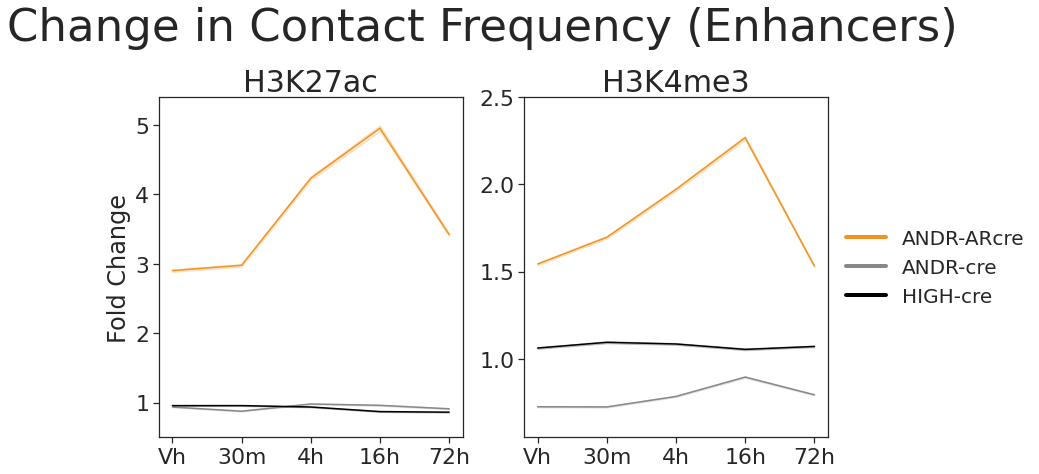

In [8]:

fig = plt.figure(figsize=[12,7])
gs = gridspec.GridSpec(nrows=1, ncols=2, top=0.8)

fig.add_subplot(gs[0])
tmp1 = pd.DataFrame(np.array(FC1_H3K27ac), columns=["Vh", "30m","4h", "16h", "72h"])
tmp1 = tmp1.stack().reset_index()
sns.lineplot(data=tmp1, x='level_1',y=0, color='#F19321')
tmp2 = pd.DataFrame(np.array(FC2_H3K27ac), columns=["Vh", "30m","4h", "16h", "72h"])
tmp2 = tmp2.stack().reset_index()
sns.lineplot(data=tmp2, x='level_1',y=0, color='#888888')
tmp3 = pd.DataFrame(np.array(FC3_H3K27ac), columns=["Vh", "30m","4h", "16h", "72h"])
tmp3 = tmp3.stack().reset_index()
sns.lineplot(data=tmp3, x='level_1',y=0, color='#000000')


plt.ylim(0.5, 5.4)


plt.title(f"H3K27ac", fontsize=30)


plt.ylabel("Fold Change")

#plt.plot(np.linspace(-1,5, 5), [1]*5, lw=2, ls='--', color='#888888')
#plt.xlim(-0.5,4.5)
plt.xlabel('')

fig.add_subplot(gs[1])
tmp1 = pd.DataFrame(np.array(FC1_H3K4me3), columns=["Vh", "30m","4h", "16h", "72h"])
tmp1 = tmp1.stack().reset_index()
sns.lineplot(data=tmp1, x='level_1',y=0, color='#F19321')
tmp2 = pd.DataFrame(np.array(FC2_H3K4me3), columns=["Vh", "30m","4h", "16h", "72h"])
tmp2 = tmp2.stack().reset_index()
sns.lineplot(data=tmp2, x='level_1',y=0, color='#888888')
tmp3 = pd.DataFrame(np.array(FC3_H3K4me3), columns=["Vh", "30m","4h", "16h", "72h"])
tmp3 = tmp3.stack().reset_index()
sns.lineplot(data=tmp3, x='level_1',y=0, color='#000000')




plt.ylim(0.55, 2.5)


plt.title(f"H3K4me3", fontsize=30)



fig.suptitle('Change in Contact Frequency (Enhancers)', fontsize=45)


handles = [Line2D([0], [0], color="#F19321", lw=4), Line2D([0], [0], color='#888888', lw=4),Line2D([0], [0], color='#000000', lw=4)]
plt.legend(handles,  [f"ANDR-ARcre", 'ANDR-cre', f"HIGH-cre"],loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, frameon=False, fontsize=20)

plt.ylabel('')
plt.xlabel('')

#fig.savefig('../plots/contactChangeEnhancer.pdf', bbox_inches ="tight",  pad_inches = 1 )

# THE PROMOTER VIEW

In [37]:
#np.random.seed(1)
s = 'H3K27ac'

geneset = list([n for n, nc in MAPcl.items() if nc == 'ANDR'])
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:

        d = H.get_edge_data(p, e)
        l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

        A += [l]

c1 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])


geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=len(andr)))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        d = H.get_edge_data(p, e)
        l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

        A += [l]

c3 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])




BOOT = 100
FC1_H3K27ac = np.zeros((BOOT, 5))
FC3_H3K27ac = np.zeros((BOOT, 5))
#for j, s in enumerate(['H3K27ac', 'H3K4me3']):
####################################
np.random.seed(7)
for i in range(BOOT):
    geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=len(andr)))
    I = {
        n:list(nx.bfs_layers(H, n))[1]
        for n in geneset
        if n in H
        if len(list(nx.bfs_layers(H, n))) > 1
    }
    pal = ['#5F9BD3', '#FBB550']

    A = []
    for p,es in I.items():
        for e in es:
            if MAPcl[e] == 'cre':
                d = H.get_edge_data(p, e)
                l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

                A += [l]

    tmp = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])

    FC1_H3K27ac[i,:] = c1.mean(0) / tmp.mean(0)
    FC3_H3K27ac[i,:] = c3.mean(0) / tmp.mean(0)        
            
            
   

In [38]:
#np.random.seed(1)
s = 'H3K4me3'

geneset = list([n for n, nc in MAPcl.items() if nc == 'ANDR'])
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:

        d = H.get_edge_data(p, e)
        l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

        A += [l]

c1 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])



geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=len(andr)))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        d = H.get_edge_data(p, e)
        l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

        A += [l]

c3 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])




BOOT = 100
FC1_H3K4me3 = np.zeros((BOOT, 5))
FC3_H3K4me3 = np.zeros((BOOT, 5))
#for j, s in enumerate(['H3K27ac', 'H3K4me3']):
####################################
np.random.seed(7)
for i in range(BOOT):
    geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=len(andr)))
    I = {
        n:list(nx.bfs_layers(H, n))[1]
        for n in geneset
        if n in H
        if len(list(nx.bfs_layers(H, n))) > 1
    }
    pal = ['#5F9BD3', '#FBB550']

    A = []
    for p,es in I.items():
        for e in es:
            if MAPcl[e] == 'cre':
                d = H.get_edge_data(p, e)
                l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

                A += [l]

    tmp = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])

    FC1_H3K4me3[i,:] = c1.mean(0) / tmp.mean(0) 
    FC3_H3K4me3[i,:] = c3.mean(0) / tmp.mean(0)        
            
            
   

Text(0.5, 0, '')

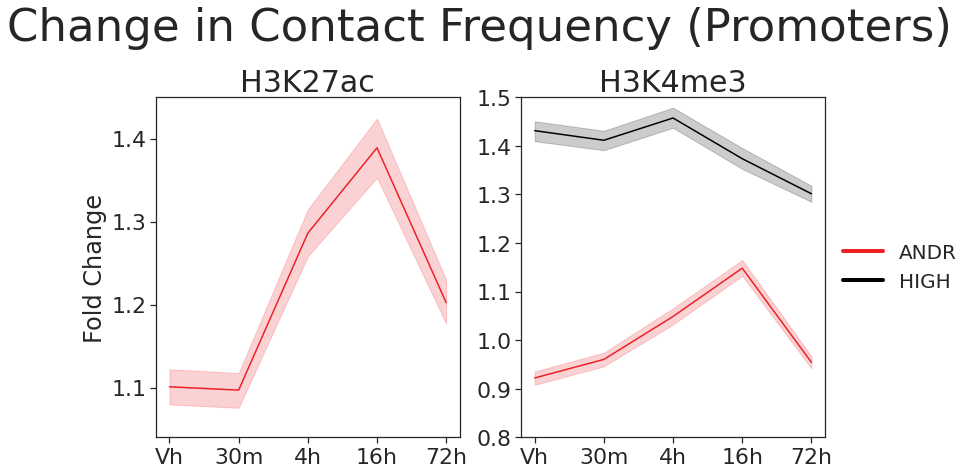

In [39]:

fig = plt.figure(figsize=[12,7])
gs = gridspec.GridSpec(nrows=1, ncols=2, top=0.8)

fig.add_subplot(gs[0])
tmp1 = pd.DataFrame(np.array(FC1_H3K27ac), columns=["Vh", "30m","4h", "16h", "72h"])
tmp1 = tmp1.stack().reset_index()
sns.lineplot(data=tmp1, x='level_1',y=0, color='#ED2024')

tmp3 = pd.DataFrame(np.array(FC3_H3K27ac), columns=["Vh", "30m","4h", "16h", "72h"])
tmp3 = tmp3.stack().reset_index()
sns.lineplot(data=tmp3, x='level_1',y=0, color='#000000')


plt.ylim(1.04, 1.45)


plt.title(f"H3K27ac", fontsize=30)


plt.ylabel("Fold Change")

#plt.plot(np.linspace(-1,5, 5), [1]*5, lw=2, ls='--', color='#888888')
#plt.xlim(-0.5,4.5)
plt.xlabel('')

fig.add_subplot(gs[1])
tmp1 = pd.DataFrame(np.array(FC1_H3K4me3), columns=["Vh", "30m","4h", "16h", "72h"])
tmp1 = tmp1.stack().reset_index()
sns.lineplot(data=tmp1, x='level_1',y=0, color='#ED2024')

tmp3 = pd.DataFrame(np.array(FC3_H3K4me3), columns=["Vh", "30m","4h", "16h", "72h"])
tmp3 = tmp3.stack().reset_index()
sns.lineplot(data=tmp3, x='level_1',y=0, color='#000000')


plt.ylim(0.8, 1.5)


plt.title(f"H3K4me3", fontsize=30)



fig.suptitle('Change in Contact Frequency (Promoters)', fontsize=45)


handles = [Line2D([0], [0], color="#ED2024", lw=4),Line2D([0], [0], color='#000000', lw=4)]
plt.legend(handles,  [f"ANDR", 'HIGH',],loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, frameon=False, fontsize=20)


plt.ylabel('')
plt.xlabel('')

#fig.savefig('../plots/contactChangePromoter.pdf', bbox_inches ="tight",  pad_inches = 1 )

# NOTE: THE BLACK HIGHLY EXPRESSED GENES ARE RANDOMLY SELECTED! 
# THE RED (AR-REGULATED) GENES DO NOT CHANCE WHLIE BLACK DOES!

# Down Regulated

In [32]:
down = pickle.load(open('data/down_genes.p', 'rb'))

In [33]:

s = 'H3K27ac'


#geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'ANDR'], size=len(andr)))
geneset = down
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}
print(f'dANDR G: {len(I)}')
A = []
for p,es in I.items():
    for e in es:
        if MAPcl[e] == 'ARcre':
            d = H.get_edge_data(p, e)
            l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

            A += [l]

print(f'dANDR G -> ARcre: {len(A)}')
c2 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])

geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=100))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}
print(f'HIGH G: {len(I)}')
A = []
for p,es in I.items():
    for e in es:
        if MAPcl[e] == 'cre':
            d = H.get_edge_data(p, e)
            l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

            A += [l]
print(f'HIGH G -> cre: {len(A)}')
c3 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])


BOOT = 100
FC2_H3K27ac = np.zeros((BOOT, 5))
FC3_H3K27ac = np.zeros((BOOT, 5))
#for j, s in enumerate(['H3K27ac', 'H3K4me3']):
####################################
np.random.seed(7)
for i in range(BOOT):
    geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=100))
    I = {
        n:list(nx.bfs_layers(H, n))[1]
        for n in geneset
        if n in H
        if len(list(nx.bfs_layers(H, n))) > 1
    }
    pal = ['#5F9BD3', '#FBB550']

    A = []
    for p,es in I.items():
        for e in es:
            if MAPcl[e] == 'cre':
                d = H.get_edge_data(p, e)
                l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

                A += [l]

    tmp = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])

    FC2_H3K27ac[i,:] = c2.mean(0) / tmp.mean(0)
    FC3_H3K27ac[i,:] = c3.mean(0) / tmp.mean(0)        
            
            
   

dANDR G: 34
dANDR G -> ARcre: 34
HIGH G: 98
HIGH G -> cre: 1054


In [34]:

s = 'H3K4me3'

geneset = down#list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'ANDR'], size=len(andr)))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        if MAPcl[e] == 'ARcre':
            d = H.get_edge_data(p, e)
            l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

            A += [l]

c2 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])

geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=100))
I = {
    n:list(nx.bfs_layers(H, n))[1]
    for n in geneset
    if n in H
    if len(list(nx.bfs_layers(H, n))) > 1
}

A = []
for p,es in I.items():
    for e in es:
        if MAPcl[e] == 'cre':
            d = H.get_edge_data(p, e)
            l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

            A += [l]

c3 = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])


BOOT = 100
FC2_H3K4me3 = np.zeros((BOOT, 5))
FC3_H3K4me3 = np.zeros((BOOT, 5))
#for j, s in enumerate(['H3K27ac', 'H3K4me3']):
####################################
np.random.seed(7)
for i in range(BOOT):
    geneset = list(np.random.choice([n for n, nc in MAPcl.items() if nc == 'High'], size=100))
    I = {
        n:list(nx.bfs_layers(H, n))[1]
        for n in geneset
        if n in H
        if len(list(nx.bfs_layers(H, n))) > 1
    }
    pal = ['#5F9BD3', '#FBB550']

    A = []
    for p,es in I.items():
        for e in es:
            if MAPcl[e] == 'cre':
                d = H.get_edge_data(p, e)
                l = [d[k] for k in [f"{s}.Vh",f"{s}.30m",f"{s}.4h", f"{s}.16h", f"{s}.72h"]]

                A += [l]

    tmp = pd.DataFrame(np.array(A), columns=["Vh", "30m","4h", "16h", "72h"])

    FC2_H3K4me3[i,:] = c2.mean(0) / tmp.mean(0)
    FC3_H3K4me3[i,:] = c3.mean(0) / tmp.mean(0)        
            
            
   

Text(0.5, 0, '')

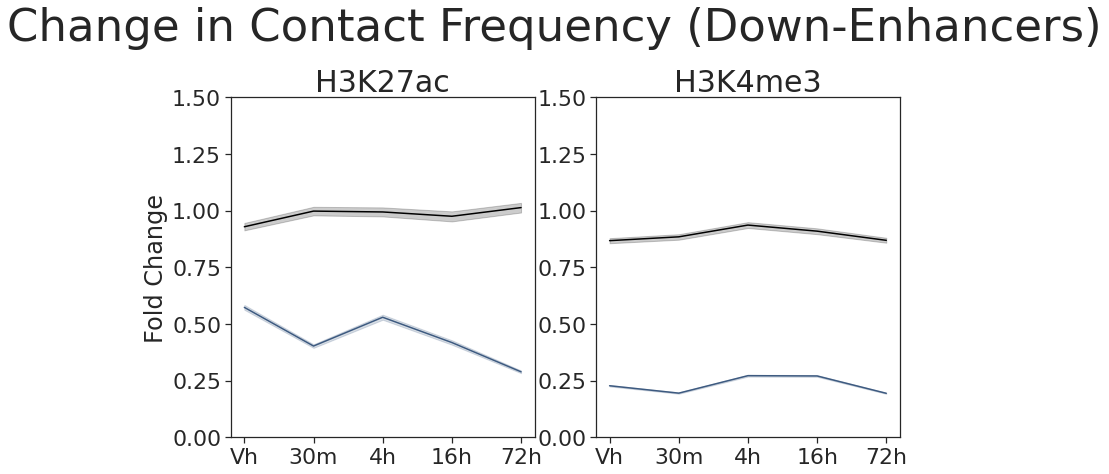

In [36]:

fig = plt.figure(figsize=[12,7])
gs = gridspec.GridSpec(nrows=1, ncols=2, top=0.8)

fig.add_subplot(gs[0])
tmp2 = pd.DataFrame(np.array(FC2_H3K27ac), columns=["Vh", "30m","4h", "16h", "72h"])
tmp2 = tmp2.stack().reset_index()
sns.lineplot(data=tmp2, x='level_1',y=0, color='#3d5a80')
tmp3 = pd.DataFrame(np.array(FC3_H3K27ac), columns=["Vh", "30m","4h", "16h", "72h"])
tmp3 = tmp3.stack().reset_index()
sns.lineplot(data=tmp3, x='level_1',y=0, color='#000000')


plt.ylim(0, 1.5)


plt.title(f"H3K27ac", fontsize=30)


plt.ylabel("Fold Change")
plt.xlabel('')

fig.add_subplot(gs[1])
tmp2 = pd.DataFrame(np.array(FC2_H3K4me3), columns=["Vh", "30m","4h", "16h", "72h"])
tmp2 = tmp2.stack().reset_index()
sns.lineplot(data=tmp2, x='level_1',y=0, color='#3d5a80')
tmp3 = pd.DataFrame(np.array(FC3_H3K4me3), columns=["Vh", "30m","4h", "16h", "72h"])
tmp3 = tmp3.stack().reset_index()
sns.lineplot(data=tmp3, x='level_1',y=0, color='#000000')


plt.ylim(0, 1.5)


plt.title(f"H3K4me3", fontsize=30)



fig.suptitle('Change in Contact Frequency (Down-Enhancers)', fontsize=45)

plt.ylabel('')
plt.xlabel('')

#fig.savefig('../plots/contactChangeEnhancer_Down.pdf', bbox_inches ="tight",  pad_inches = 1 )

# NOTE: THE PUBLICATION FIGURES BOOTSTRAPPED 1000 TIMES